In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import pickle

# Настройка путей
current_dir = os.path.dirname(os.getcwd())
sys.path.append(current_dir)

# Импорты из проекта
from datasets.dataset import PartsDataset, val_transforms

In [4]:
# Анализ датасета
# Загрузка данных
dataset = PartsDataset(root_dir='../data/raw', transform=val_transforms)

print(f"Общее количество изображений: {len(dataset)}")
print(f"Количество классов: {len(dataset.label_to_idx)}")

# Распределение изображений по классам
class_counts = {}
for i in range(len(dataset)):
    _, label, _ = dataset[i]
    class_name = dataset.idx_to_label[label]
    class_counts[class_name] = class_counts.get(class_name, 0) + 1

print("\nРаспределение по классам:")
for class_name, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{class_name}: {count} изображений")

Общее количество изображений: 25014
Количество классов: 1058

Распределение по классам:
10811: 159 изображений
108: 153 изображений
10741: 130 изображений
10816: 129 изображений
10762: 120 изображений
10734: 112 изображений
10745: 112 изображений
10814: 112 изображений
10739: 110 изображений
10742: 110 изображений
10743: 110 изображений
10744: 110 изображений
10746: 110 изображений
10808: 110 изображений
10809: 110 изображений
10815: 109 изображений
10766: 107 изображений
8628: 100 изображений
10747: 99 изображений
5637: 96 изображений
10264: 95 изображений
22: 95 изображений
8407: 91 изображений
335: 90 изображений
6244: 90 изображений
887: 90 изображений
10892: 89 изображений
619: 89 изображений
7738: 84 изображений
74: 81 изображений
211: 80 изображений
2260: 80 изображений
493: 80 изображений
5586: 80 изображений
5649: 80 изображений
5951: 80 изображений
5978: 80 изображений
7914: 80 изображений
8631: 80 изображений
9285: 80 изображений
9530: 80 изображений
172: 77 изображений
231:

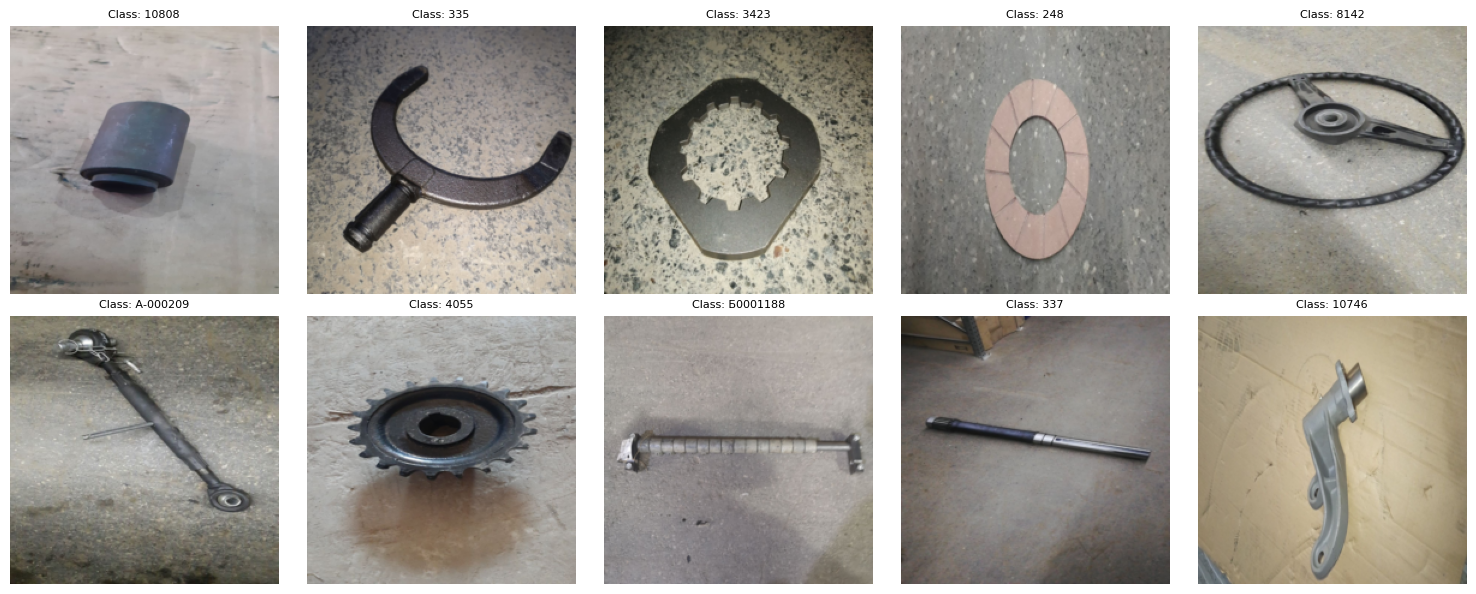

In [6]:
# Визуализация данных
def denormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """Денормализация тензора ImageNet нормализованных изображений"""
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

# Показать изображения с нормализацией (для корректного отображения)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, len(dataset))
    image, label, img_path = dataset[idx]
    
    # Денормализуем изображение для отображения
    image_denorm = denormalize(image.clone())  # clone чтобы не менять оригинал
    image_np = image_denorm.permute(1, 2, 0).numpy()
    
    # Убеждаемся, что значения в диапазоне [0, 1]
    image_np = np.clip(image_np, 0, 1)
    
    axes[i].imshow(image_np)
    axes[i].set_title(f"Class: {dataset.idx_to_label[label]}", fontsize=8)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Анализ эмбеддингов
# Загрузка эмбеддингов
embeddings = np.load('../embeddings/embeddings.npy')
labels = np.load('../embeddings/labels.npy')

print(f"Форма эмбеддингов: {embeddings.shape}")
print(f"Форма меток: {labels.shape}")

# Статистика эмбеддингов
print(f"\nСтатистика эмбеддингов:")
print(f"Среднее значение: {np.mean(embeddings):.4f}")
print(f"Стандартное отклонение: {np.std(embeddings):.4f}")
print(f"Минимальное значение: {np.min(embeddings):.4f}")
print(f"Максимальное значение: {np.max(embeddings):.4f}")

Форма эмбеддингов: (25014, 2048)
Форма меток: (25014,)

Статистика эмбеддингов:
Среднее значение: 0.4151
Стандартное отклонение: 0.4270
Минимальное значение: 0.0000
Максимальное значение: 8.4780
